<h1>Video Game Scores and Popularities: The Differences Between Gamers' and Professional Critics' Assessments by Genres</h1>

<h2>1. Aims, objectives and background</h2>

<h3>1.1 Introduction</h3>
    
Video game industry is one of the biggest industries in the entertainment sector. It is, in fact, bigger than Hollywood and Music industry combined [1]. As the market is big, many video games are being published every year in many different genres.

However, not every genre is as successful as other genres. While some genres are very popular for decades, some genres become popular only for a while and lose their popularity rapidly.

Assessment of video games' 'goodness' is also not an easy task. While there are professional reviews and awards, in many cases it contradicts with gamers' opinions on them. One popular example is 'The Last of Us Part II', with the critics' score (Metascore) of 93 against gamers' score (User Score) 5.7 in metacritic.com [2]. As the game is selected 'The Game of the Year' in 2020, which is awarded mostly by a jury consisting professional critics [3], the debates about the topic of whether the critics are really a good source to guess if gamers would like the game or not is deepened. 

In this project, I wanted to see how different gamers and professional reviewers assess video game genres. To do that I web scraped one of the most popular video game review websites to get score data and compared the gamers' scores and critics' scores for different genres.

<h3> 1.2 Aims and Objectives </h3>

With this project, I would like to explore the following:

 In 2021:
 - To see which genres are more popular than the others in terms of published video games
 - To see which genres are viewed more successful by gamers and professional critics
 - To see, in which genres, the difference is bigger between gamers' scores and professional critics' scores
 
 The reasons to select 2021 as an example are:
 
 - As the game industry is getting larger, so the number of published games and reviewers increase every year
 - As with every passing year, the distribution of age (gamers who are older) and number of players increases
 - The publication period of this report is June 2022, but data changes every passing day. This would carry the risk of out-of-date comments in analyses of data if 2022 would be selected rather than 2021. Also, 2022 has fewer titles than 2021 as of June.
 
 One thing to note is that, we are not interested about the reasons behind the differences, but only to spot for what genre there are differences and how much they differ.
 
 <h3> 1.3 Data </h3>
 
 <h4> 1.3.1 Metacritic.com </h4>

Metacritic is one of the most popular websites to assess video games, movies, TV shows and music. For video games, metacritic scores are viewed as the biggest reference to measure the 'goodness' of a video game by many people.

Metacritic.com has two different categories to score games:
   - Metascore: A weighted average of reviews from top critics (score from the professional critics)
   - Userscore: An average rating score from the users (score from the gamers)
   
Metacritic.com also tags video games for different genres.

<h4> 1.3.2 Limitations and Constraints of the Data </h4>

<h5> Data Source </h5>

The data is only taken from 1 website. Even though it is arguably the most popular website to score video games, and consists of the average score from a wide range of critic websites, there will be error margins.

<h5> Lack of Some Games </h5>

Even though the data consists of all the games which reached a small amount of popularity, not all games made it to the metacritic.com. Also, the database I have created from metacritic.com, does not consist of titles which did not have reviews of fewer than 7 critics.

<h5> Lack of User Scores </h5>

Every game in the database consists metascores as the games which have less than 7 critics are excluded. But not all of them has userscores, which increases the error margin.

<h5> Protests in User Scores </h5>

Some games might be a target of protest and given 0 ratings collectively by users, without any objectivity. The protest against 'Diablo Immortal' and 'Star Wars: Battlefront 2' are good examples of this, where users protested the games due to games' business models by collectively giving them 0 scores. Still, one might argue it also shows one of the difference points between professional critics and gamers while scoring a game.

<h5> Platform Differences </h5>

Metacritic.com differs the games according to their platforms, which results in some games to show up multiple times. As generally the scores of the same game for different platforms becomes similar, this results in the over-representation of one game.

Another noteworthy point is that some games are developed for a specific platform. However, when they are ported to different platforms for earning more money, the game might be less playable on different platforms due to lack of optimization in terms of performance or even controls. This also affects the scores.

<h2> 1.4 Ethical Considerations </h2>

<h3> 1.4.1 Web Scraping </h3>

Metacritic.com doesn't state that web scraping is not allowed in their terms and conditions.

<h3> 1.4.2 Server Usage </h3>

In order not to flood the web server for lots of requests, a sleeping time between each request is put. Even though for metacritic.com, which has big servers, the amount of requests are not that big to flood using only 1 computer, for smaller websites, this ethical behaviour is important.

<h3> 1.4.3 Potential Impacts of Using Data </h3>

The analyses of data do not consist of targeting specific games or companies. None of the games or companies are targeted by their scores. Therefore, the negative impacts from the analyses of data is minimal.

Also, no intellectual properties are beached.

<h3> 1.4.4 Biases </h3>

The data is clean of game titles which have little reviews from critics. Also, metacritic.com consists of reviews from many different locations, cultures and backgrounds.



<h2>2. Webscraping and Creating the Game Database</h2>
    
We will start coding with webscraping. However, just before webscraping, as this section is the first section we will use python, we will first import all necessary libraries and modules here. Also, global style features for graphs are declared here.

In [1]:
#Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import csv
import time
import operator

plt.style.use('seaborn-whitegrid')

Now, we can start coding part. First, we will the declare array to collect URL pages. This URLs are used to store 'game search' pages from metacritic.com.

In [2]:
urls = []

Metacritic search page consists 100 titles per page while searching for games. Therefore, ee first need to append the starting page to the urls array. From the first page, we will have necessary information to proceed the next steps.

In [3]:
urls.append('https://www.metacritic.com/browse/games/score/metascore/year/all/filtered?year_selected=2021&distribution=&sort=desc&view=detailed')

We parse the starting page into the soup.

In [4]:
user_agent = {'User-agent': 'Mozilla/5.0'}
response = requests.get(urls[0], headers = user_agent)

soup = BeautifulSoup(response.text, 'html.parser')

Now, as we scraped our starting page, we can learn how many pages there are consisting 100 titles (maximum) per page.

In [5]:
def find_the_last_page():
    return int(soup.find('li', class_='page last_page').find('a', class_='page_num').get_text())

In [6]:
page_count = find_the_last_page()
print("The number of pages: " + str(page_count))

The number of pages: 10


Next, we append every URL of 'search page' which consists 100 titles (except the last page) per page to urls array.

In [7]:
#Clear the first element in order to prevent duplications
urls.clear()

base_url = 'https://www.metacritic.com/browse/games/score/metascore/year/all/filtered?year_selected=2021&distribution=&sort=desc&view=detailed&page='

#Populate urls array with the page urls
for i in range(page_count):
    
    #URL is made up with the combination of base_url and the page number. Make it and append it to the urls array
    url = base_url + str(i)
    urls.append(url)

As we have the 'search pages', we can now start getting th urls of pages dedicated to one title. title_url_db will store the URLs.

In [8]:
title_url_db = []

Below is the function to append the games' URL as a dictionary, from a "search page".

In [9]:
def populateUrlDatabaseFromPage():
    for clampList in soup.find_all('table', class_='clamp-list'):
        for title in clampList.find_all('td', class_='clamp-image-wrap'):
            title_url = title.find('a').get('href')
            title_url_db.append(title_url)
    
    

For every "search page" we iterate and append the titles' dedicated pages' urls into title_url_db database.

In [10]:
for i in range(len(urls)):    
    response = requests.get(urls[i], headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    populateUrlDatabaseFromPage()
    
    #For ethical concerns
    time.sleep(random.randint(1, 5) * 0.1)


Now, as we have all the necessary, we can start creating our database.

game_db is going to be the array to store our database

In [11]:
game_db = []

Below, there is a function to append a title's data to the database, from a dedicated title page.

In [12]:
def appendGameDatabase(index):
    # Getting the necessary data
    idNum = index
    title = soup.find('div', class_='product_title').find('h1').get_text()
    platform = soup.find('div', class_='product_title').find('span', class_='platform').get_text(strip=True).replace("\n", "")
    metascore = soup.find('div', class_='details main_details').find('a', class_='metascore_anchor').find('div').get_text()
    userscore = soup.find('div', class_='details side_details').find('a', class_='metascore_anchor').find('div').get_text()
    
    # One title has different genres, so we need to parse it
    genre = [] 
    for element in soup.find('li', class_='summary_detail product_genre').find_all('span', class_='data'):
        genre.append(element.get_text())

    # Creating the dictionary and append it to the database
    game_element = {'id' : index, 'title' : title, 'platform' : platform, 'metascore' : metascore, 'userscore' : userscore, 'genre' : genre}

    game_db.append(game_element)
        
        
    

As we defined our function, we can iterate through our URL database and populate our main database, game_db.

In [13]:
exceptionCounter = 0

for i in range(len(title_url_db)):
    url_to_execute = 'https://www.metacritic.com/' + title_url_db[i]
    response = requests.get(url_to_execute, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    try:
        appendGameDatabase(i)
    except:
        exceptionCounter += 1
        
    time.sleep(random.randint(1, 5) * 0.1)
    
print("Database is created.")
print("Exceptions handled due to errors: " + str(exceptionCounter))
print("Total number of game titles: " + str(len(title_url_db)))


Database is created.
Exceptions handled due to errors: 2
Total number of game titles: 973


<h2>3. Processing the Game Database and Calculating Average Scores</h2>
    
As we have our game database created, we can calculate the average scores from gamers and critics to see if they possess a meaningful difference or not.

First, we need to modify game_db. Currently, userscores and metascores are stored as strings. We need to convert them into floats. Also, some scores are listed as 'tbd', which means 'to be determined'. At the moment we, will not touch them (cleaning the whole line would cause the loss of necessary data) but we will also take them into the account.

In [14]:
# Converting string scores to float scores
for game in game_db:
    if game['metascore'] != 'tbd':
        game['metascore'] = float(game['metascore'])
    if game['userscore'] != 'tbd':
        game['userscore'] = float(game['userscore']) * 10

As we have the scores as floats, we are ready to calcualte their average scores. Below, there is a function to calcualte average scores, re-usable for both metascore and userscore.

In [15]:
def avgCalculator(arrayInput, keyInput):

    tempTotal = 0.0
    counter = 0
    
    for element in arrayInput:
        if element[keyInput] != 'tbd' and element[keyInput] <= 100:
            tempTotal = tempTotal + element[keyInput]
            counter += 1
    
    return (tempTotal/counter)

Calculating the averages for both metascore and userscore, round them to make them more human-friendly and store them in variables.

In [16]:
# Rounding makes the results more human-friendly for reading.
userscoreGeneralAvg = round(avgCalculator(game_db, 'userscore'), 2)
metascoreGeneralAvg = round(avgCalculator(game_db, 'metascore'), 2)

Finally, we can visualize the data. 

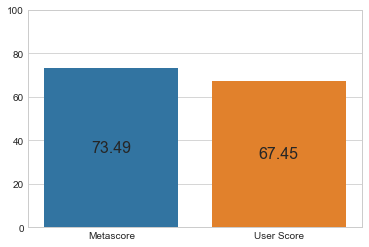

In [17]:
keys = ["Metascore", "User Score"]
values = [metascoreGeneralAvg, userscoreGeneralAvg]

ax = sns.barplot(x = keys, y = values)
plt.ylim(0,100)
plt.xlabel("")
plt.ylabel("")
plt.bar_label(ax.containers[0], size = 16, label_type= 'center');




The average score of metascores for all games in metacritics in 2021 is 73.49. On the other hand, average User Score is 67.45. 

The difference, 6.04 points, shows gamers scored 8.21% lower than professional critics.  We can see that, on average, gamers are harder to be pleased and tend to score less comparing to professional critics. 

<h2>4. Creating the Genres Database<h2>

As we have our database including all titles, now we can process this database and start creating the genre database.

Genre databse will store information about genres name, how many genres is tagged on a game, genres' average metascores and also the genres' average userscores.

Below, there is a function to create this database using an input database, which will be game database.

In [18]:
def populateByGenre(inputArray):
    genreArray = []
    outputArray = []
    for element in inputArray:
        if element['userscore'] != 'tbd' and element ['metascore'] != 'tbd':
            for genreElement in element['genre']:
                if genreElement not in genreArray:
                    genreArray.append(genreElement)
                    newGenreDict = {'genre': genreElement, 'metascore': element['metascore'], 'userscore': element['userscore'], 'count' : 1}
                    outputArray.append(newGenreDict)
                else:
                    for dictElement in outputArray:
                        if dictElement['genre'] == genreElement:
                            dictElement['metascore'] = round(((dictElement['metascore']) * int(dictElement['count']) + element['metascore'] ) / int( dictElement['count'] + 1) , 2)
                            dictElement['userscore'] = round(((dictElement['userscore']) * int(dictElement['count']) + element['userscore'] ) / int( dictElement['count'] + 1) , 2)
                            dictElement['count'] = int(dictElement['count']) + 1
                            
    return outputArray
    

Using the popualteByGenre function, now we can create our genre database, genre_db.

In [19]:
genre_db = populateByGenre(game_db)
df = pd.DataFrame(genre_db)


In [20]:
print(df)

            genre  metascore  userscore  count
0    Role-Playing      75.53      70.36    160
1         General      75.09      67.61    232
2   Western-Style      80.00      72.29     10
3       Adventure      74.37      69.41    115
4    Visual Novel      76.43      72.80     14
..            ...        ...        ...    ...
80           MOBA      70.00      37.00      1
81           Golf      70.00      56.00      1
82      Athletics      67.33      55.33      3
83         Career      69.00      51.00      1
84         Tennis      58.00      31.00      1

[85 rows x 4 columns]


<h2>4. Cleaning the Genres Database<h2>

We have 85 different genres. However, many genres in the list are only listed for too few times. To be able to analyse the data for more meaningful ways, we need to clean the database.

First, we need to cluster the genres by their counts. Below, there is a funciton to cluster the genres by that how many times they are tagged to a video game.

In [21]:
def getGenreCounts(inputArray):
    
    genreCountDict = {'1' : 0, '2-10' : 0, '11-20' : 0, '21-40' : 0, '41-99' : 0, '100+' : 0}
    
    for genre in inputArray:
        if genre['count'] == 1:
            genreCountDict['1'] += 1
        elif genre['count'] >= 2 and genre['count'] <= 10:
            genreCountDict['2-10'] += 1
        elif genre['count'] >= 11 and genre['count'] <= 20:
            genreCountDict['11-20'] += 1
        elif genre['count'] >= 21 and genre['count'] <= 40:
            genreCountDict['21-40'] += 1
        elif genre['count'] >= 41 and genre['count'] <= 99:
            genreCountDict['41-99'] += 1           
        elif genre['count'] >= 100:
            genreCountDict['100+'] += 1 
    return genreCountDict


Using the getGenreCounts function, we created a new database array to see the distribution of genre counts.

In [22]:
genreCounts = getGenreCounts(genre_db)

Showing the results as a plotbar.

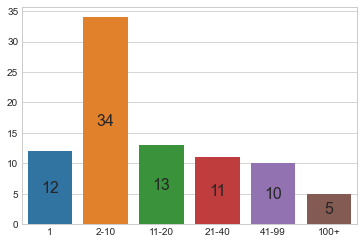

In [23]:
keys = list(genreCounts.keys())
values = [genreCounts[k] for k in keys]
ax = sns.barplot(x = keys, y = values)

plt.bar_label(ax.containers[0], size = 16, label_type= 'center');


We can see from the graph above, 12 genres are tagged only once, while 34 are tagged between 2-10 times. These genres do not carry big significance or carrying a big error margins due to their low counts. Therefore, they need to be removed.

In [24]:
genre_db_cleaned = []

# Cleaning the genre database from low counted genres.
for genre in genre_db:
    if genre['count'] > 10:
        genre_db_cleaned.append(genre)

After cleaning the database, we have the following new database.

In [25]:
df = pd.DataFrame(genre_db_cleaned)
print(df)

               genre  metascore  userscore  count
0       Role-Playing      75.53      70.36    160
1            General      75.09      67.61    232
2          Adventure      74.37      69.41    115
3       Visual Novel      76.43      72.80     14
4             Puzzle      79.20      70.07     15
5   Action Adventure      75.54      70.42    207
6             Linear      82.36      82.99     19
7             Racing      73.38      64.21     29
8         Simulation      73.80      59.46     33
9         Automobile      73.19      64.27     28
10            Action      73.70      67.67    228
11        Platformer      73.85      69.88     93
12                3D      70.76      66.77     77
13       Beat-'Em-Up      74.79      65.84     24
14        Open-World      76.39      68.53     68
15            Sports      72.02      49.00     34
16        Individual      72.68      57.06     16
17     Miscellaneous      74.15      65.32     50
18       Compilation      75.37      64.07     40


We have 38 different genres. However, observing the genre titles, we can see that more modification is needed. We still have the following issues:
   - Some genres are in fact very similar and need to be counted as one, such as tactics and tactical.
   - Some genres are named as two different genres, such as Action Adventure. As we have Action and Advanture as different genres already, we need to have a divide and add operation for those.
   - Some genres are not specific, such as 'General', 'Miscillenous' or 'Compilation', they need to be removed.
   - Some genres are not genre at all but emphasizing a feature of the game, such as '3D' or 'Team'. These features are misleading, as most 3D do not even tagged as 3D. Therefore, they need to be removed too.

To be able to do these operations, we have the following 3 functions.

In [26]:
# Merges two different genres to have a one genre
def mergeGenres(firstInputGenre, secondInputGenre, newGenreName, databaseArray):
    
    genre1 = None
    genre2 = None
    
    # Find genres by genrenames
    for genre in databaseArray:
        if genre['genre'] == firstInputGenre:
            genre1 = genre
        elif genre['genre'] == secondInputGenre:
            genre2 = genre
    
    # Checking if the inputs exist
    if genre1 == None and genre2 == None:
        print(firstInputGenre + " and " +  secondInputGenre + " does not exist")
        return
    if genre1 == None:
        print(firstInputGenre + " does not exist")
        return
    if genre2 == None:
        print(secondInputGenre + " does not exist")
        return
              
    # New values for the merged genre
    newCount = genre1['count'] + genre2['count']
    newUserscore = round(( genre1['userscore'] * genre1['count'] + genre2['userscore'] * genre2['count'] ) / newCount , 2) 
    newMetascore = round(( genre1['metascore'] * genre1['count'] + genre2['metascore'] * genre2['count'] ) / newCount , 2)
    

    # Delete the old genres
    for genre in databaseArray:
        if genre['genre'] == firstInputGenre or genre['genre'] == secondInputGenre:
            databaseArray.remove(genre)
    
    # Add the genre to the database
    newGenre = {'genre': newGenreName, 'metascore': newMetascore, 'userscore': newUserscore, 'count' : newCount}
    databaseArray.append(newGenre)
    

# Divides one genre to two others, and got deleted from the database afterwards
def divideAndAdd(to_be_divided, to_be_added_1, to_be_added_2, databaseArray):
    genre1 = None
    genre2 = None
    divided = None
    
    # Find genres by genrenames
    for genre in databaseArray:
        if genre['genre'] == to_be_added_1:
            genre1 = genre
        elif genre['genre'] == to_be_added_2:
            genre2 = genre
        elif genre['genre'] == to_be_divided:
            divided = genre
    
    if divided == None:
        print(to_be_divided + " does not exist")
        return

    
    # New values for the first genre
    newCount_1 = genre1['count'] + divided['count']
    newUserscore_1 = round(( genre1['userscore'] * genre1['count'] + divided['userscore'] * divided['count'] ) / newCount_1 , 2)
    newMetascore_1 = round(( genre1['metascore'] * genre1['count'] + divided['metascore'] * divided['count'] ) / newCount_1 , 2)
    
    
    # New values for the second genre
    newCount_2 = genre2['count'] + divided['count']
    newUserscore_2 = round(( genre2['userscore'] * genre2['count'] + divided['userscore'] * divided['count'] ) / newCount_2 , 2)
    newMetascore_2 = round(( genre2['metascore'] * genre2['count'] + divided['metascore'] * divided['count'] ) / newCount_2 , 2)


    for genre in databaseArray:
        # Update the database
        if genre['genre'] == to_be_added_1: 
            genre['userscore'] = newUserscore_1
            genre['metascore'] = newMetascore_1
            genre['count'] = newCount_1
        elif genre['genre'] == to_be_added_2:
            genre['userscore'] = newUserscore_2
            genre['metascore'] = newMetascore_2
            genre['count'] = newCount_2
        # Delete the old genre
        elif genre['genre'] == to_be_divided:
            databaseArray.remove(genre)

# Remove a genre from the database
def removeGenre(to_be_removed, databaseArray):
    for genre in databaseArray:
        if genre['genre'] == to_be_removed:
            databaseArray.remove(genre)
            


To clean the database, we carry out the following modifications:
    - 'Sim' and 'Simulation' are merged under the name 'Simulation'
    - 'Strategy', 'Tactical' and 'Tactics' are merged under the name 'Strategy and Tactics'
    - 'Action RPG' is divided and added to 'Role-Playing' and 'Action'
    - 'Action Adventure' is divided and added to 'Adventure' and 'Action'
    - 'General', '3D', '2D', 'Miscellaneous', 'Compilation', 'Team', 'Individual', 'Real-Time' and 'Linear' genres are removed completely.

In [27]:
mergeGenres('Sim', 'Simulation', 'Simulation', genre_db_cleaned)
mergeGenres('Strategy', 'Tactics', 'Strategy', genre_db_cleaned)
mergeGenres('Strategy', 'Tactical', 'Strategy and Tactics', genre_db_cleaned)

divideAndAdd('Action RPG', 'Role-Playing', 'Action', genre_db_cleaned)
divideAndAdd('Action Adventure', 'Adventure', 'Action', genre_db_cleaned)

removeGenre('General', genre_db_cleaned)
removeGenre('3D', genre_db_cleaned)
removeGenre('2D', genre_db_cleaned)
removeGenre('Miscellaneous', genre_db_cleaned)
removeGenre('Compilation', genre_db_cleaned)
removeGenre('Team', genre_db_cleaned)
removeGenre('Individual', genre_db_cleaned)
removeGenre('Real-Time', genre_db_cleaned)
removeGenre('Linear' , genre_db_cleaned)

Then, after cleaning the database, we have the following:

In [28]:
df = pd.DataFrame(genre_db_cleaned)
print(df)

                   genre  metascore  userscore  count
0           Role-Playing      75.43      70.58    236
1              Adventure      75.12      70.06    322
2           Visual Novel      76.43      72.80     14
3                 Puzzle      79.20      70.07     15
4                 Racing      73.38      64.21     29
5             Automobile      73.19      64.27     28
6                 Action      74.67      69.28    511
7             Platformer      73.85      69.88     93
8            Beat-'Em-Up      74.79      65.84     24
9             Open-World      76.39      68.53     68
10                Sports      72.02      49.00     34
11               Shooter      72.09      63.33     76
12          First-Person      71.81      64.49     74
13                Arcade      72.23      66.16     67
14          Metroidvania      77.54      76.07     13
15              Fighting      74.50      70.49     12
16            Management      71.53      63.88     15
17            Turn-Based    

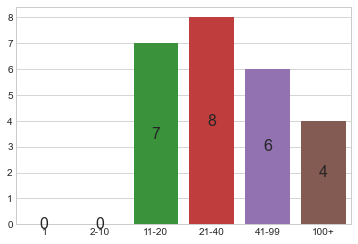

In [29]:
genreCounts_after_cleaned = getGenreCounts(genre_db_cleaned)

keys = list(genreCounts_after_cleaned.keys())
values = [genreCounts_after_cleaned[k] for k in keys]
ax = sns.barplot(x = keys, y = values)

plt.bar_label(ax.containers[0], size = 16, label_type= 'center');

<h2>5. Results <h2>

Processing the cleaned database, now we can finally see the results.

Sorting the genres by their counts, we have the following results:

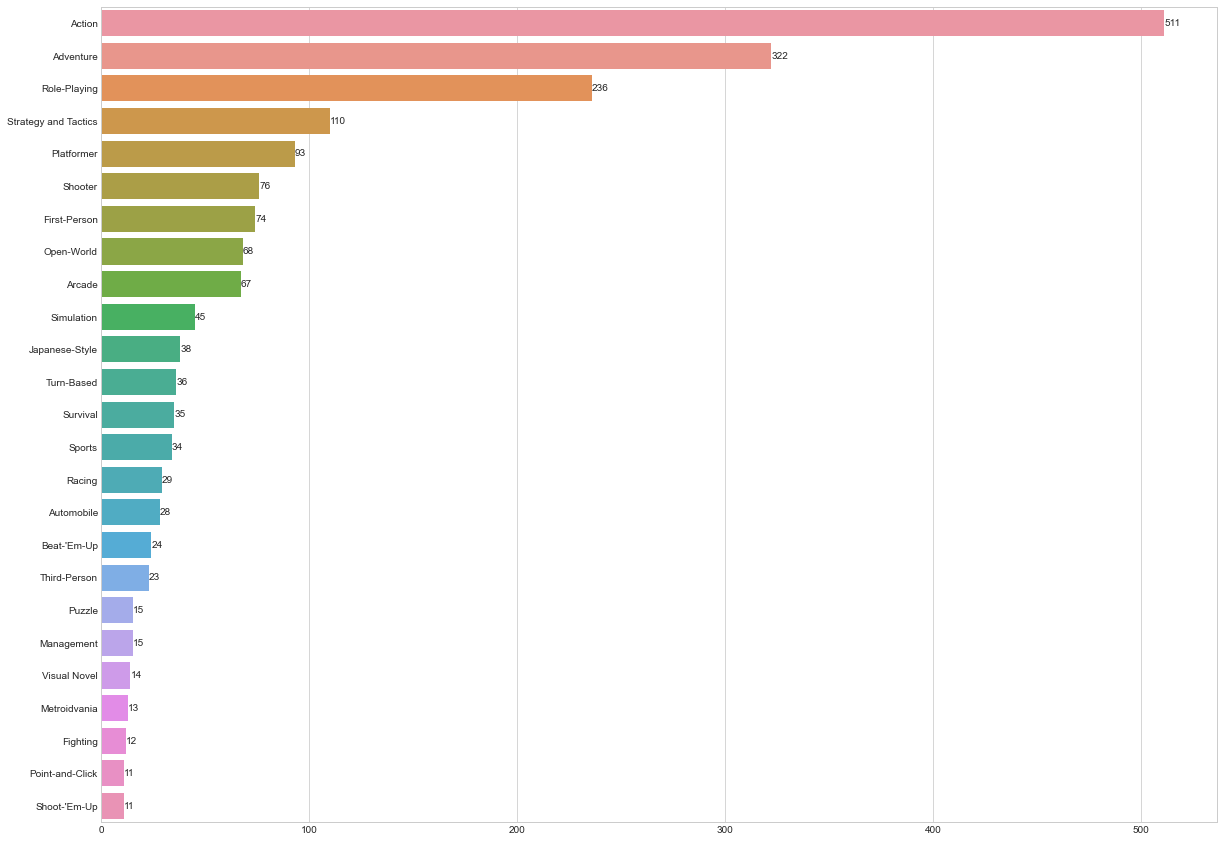

In [30]:
genre_db_sorted_by_count = sorted(genre_db_cleaned, key=lambda d: d['count'], reverse = True) 
df = pd.DataFrame(genre_db_sorted_by_count)

x_values = [genre['count'] for genre in genre_db_sorted_by_count]
y_values = [genre['genre'] for genre in genre_db_sorted_by_count]
 
ax = sns.barplot(x = x_values, y = y_values)
plt.bar_label(ax.containers[0], size = 10, label_type= 'edge');
ax.figure.set_size_inches(20,15)

'Action' games are by far the most popular genre, followed by 'Adventure' and 'Role-Playing'. 'Strategy and Tactics' is also another genre to have more 100 titles.

Now, we can also take a look at, beside their popularity, how well they are scored by critics and gamers. We sort the database by their metascores and userscores.

In [31]:
genre_db_sorted_by_metascore = sorted(genre_db_cleaned, key=lambda d: d['metascore'], reverse = True) 
genre_db_sorted_by_userscore = sorted(genre_db_cleaned, key=lambda d: d['userscore'], reverse = True) 

And the results are as follows. First, metascores:

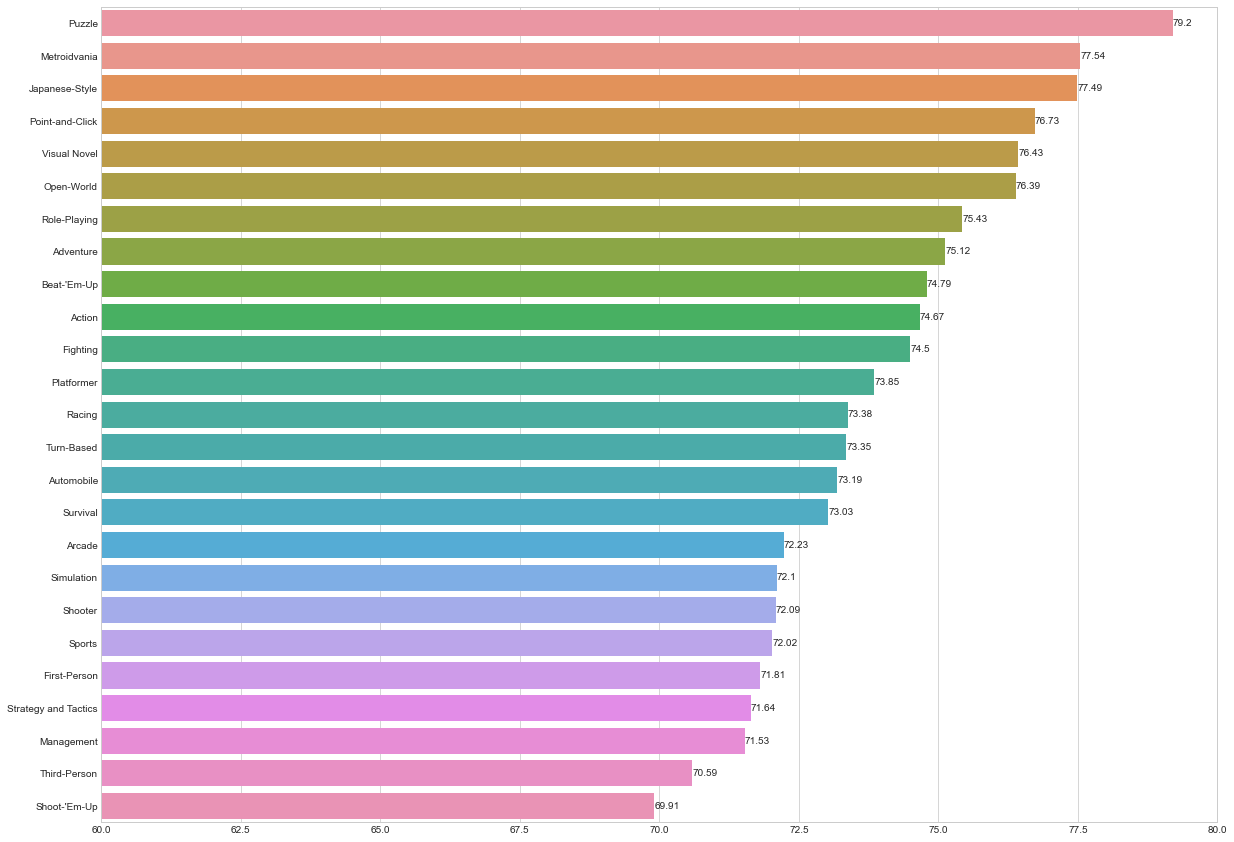

In [32]:
df = pd.DataFrame(genre_db_sorted_by_metascore)

x_values = [genre['metascore'] for genre in genre_db_sorted_by_metascore]
y_values = [genre['genre'] for genre in genre_db_sorted_by_metascore]
 
ax = sns.barplot(x = x_values, y = y_values)
ax.set_xlim(60,80)
ax.figure.set_size_inches(20,15)
plt.bar_label(ax.containers[0], size = 10, label_type= 'edge');


Puzzle games having the best average score from critics, followed by Metroidvania andJ Japanese-style. Shoot'Em-Up games are scored the least.

One more thing also to note that, between the top and the bottom scored genres, there are not even 10 point difference.

Secondly, we can take a look at the userscores.

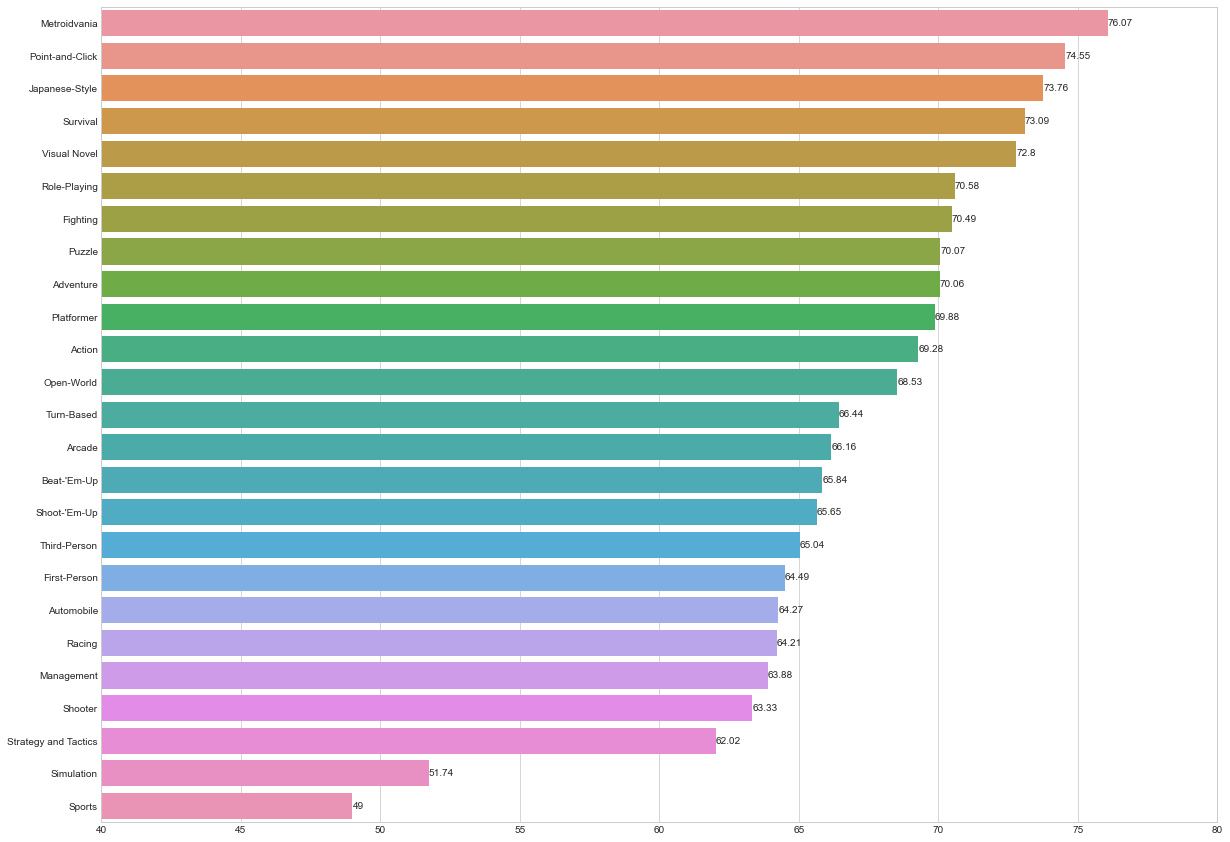

In [33]:
df = pd.DataFrame(genre_db_sorted_by_userscore)

x_values = [genre['userscore'] for genre in genre_db_sorted_by_userscore]
y_values = [genre['genre'] for genre in genre_db_sorted_by_userscore]
 
ax = sns.barplot(x = x_values, y = y_values)
ax.set_xlim(40,80)
ax.figure.set_size_inches(20,15)
plt.bar_label(ax.containers[0], size = 10, label_type= 'edge');

When it comes to users, 'Metroidvania' is the best scored game, followed by 'Point-and-Click' and 'Japanese-Style'. Sports and Simulation have the least scores, with sports even falling below 50 point score.

The scores by users also vary far more than professional critics. There is 27.07 score difference between top (Metroidvania) and bottom (Sports).

We can take a look at score differences by genre from the graph below.

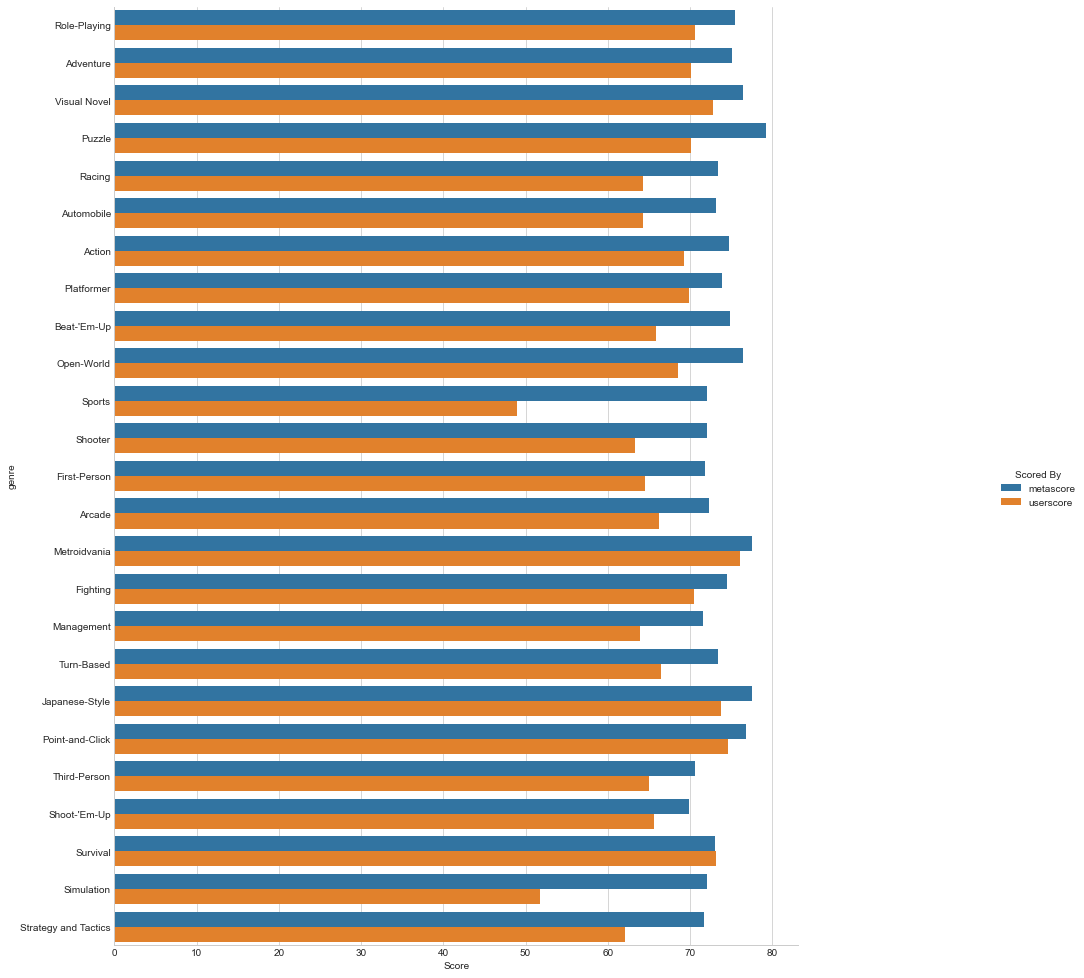

In [34]:
df = pd.DataFrame(genre_db_cleaned)
df = pd.melt(df, id_vars = "genre", value_vars = ["metascore", "userscore"], var_name = "Scored By", value_name = "Score")

ax = sns.catplot( x = 'Score', y = 'genre', hue = "Scored By", data = df, kind = 'bar')
ax.figure.set_size_inches(20,15)

If we sort them by using the function below, the results will be as follows (results are in percentages):

In [35]:
def populateByScoreDifference(databaseArray):
    
    scoreDifferences = []
    
    for genre in databaseArray:
        #Calculate the difference
        difference = round(( (genre['userscore'] - genre['metascore']) / genre['metascore'] ) * 100 , 2)
        
        newDictElement = { 'genre' : genre['genre'], 'metascore' : genre['metascore'], 'userscore' : genre['userscore'], 'difference' : difference }
        scoreDifferences.append(newDictElement)
    
    scoreDifferencesSorted = sorted(scoreDifferences, key=lambda d: d['difference'], reverse = True)
        
    return scoreDifferencesSorted

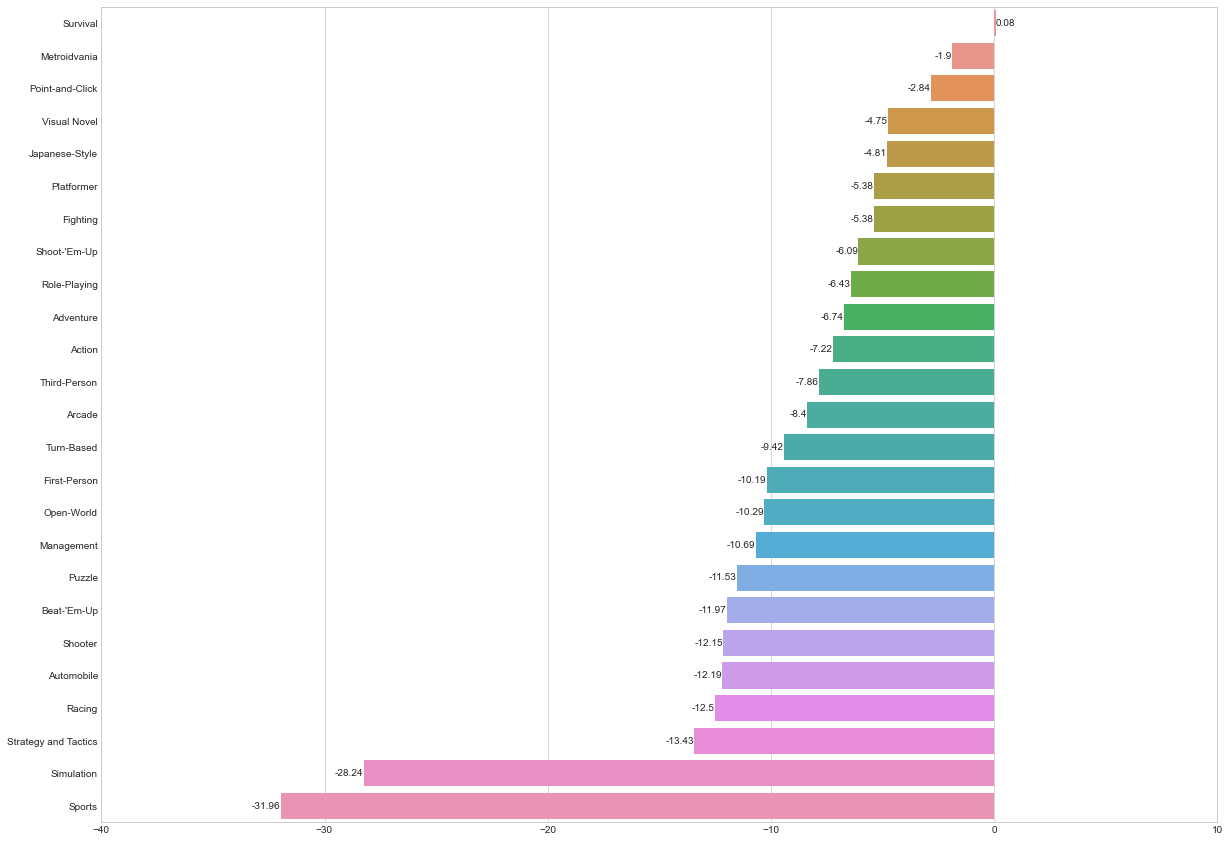

In [36]:
genreScoreDifferencesSorted = populateByScoreDifference(genre_db_cleaned)

df = pd.DataFrame(genreScoreDifferencesSorted)

x_values = [genre['difference'] for genre in genreScoreDifferencesSorted]
y_values = [genre['genre'] for genre in genreScoreDifferencesSorted]
 
ax = sns.barplot(x = x_values, y = y_values)
ax.figure.set_size_inches(20,15)
ax.set_xlim(-40,10)
plt.bar_label(ax.containers[0], size = 10, label_type= 'edge');

For almost all genres, the gamers scored lower than critics. The only exception is for survival games, which both critics and gamers scored almost the same. Other lower differences come from 'Metroidvania' and 'Point-and-Click', where users liked the most. The biggest differences are coming from 'Sports' and 'Simulation' by far, where critics reviews do not represent the gamers appeal much, with 31.96% and 28.24% differences.


    
In this report, I have tried to find for which genres and in what amount, there are differences between professional critics' and gamers' views on the 'goodness' of the games belonging that genre. I have also tried to find which genres are more popular. To do so, we have created a database from one of the most popular, if not the most, critics web-site by web-scraping.
    
As a result, we have found Action, Adventure and Role-playing games dominate the market in terms of published games. Also, we have found that, users tend to give less scores than professional critics. Users scores also varies much more comparing to the critics too. The biggest differences were in 'Sports' and 'Simulation' genres. 


<h2>6. Resources </h2>

- [1] Things Have Changed, [Online], Available: https://www.thc-pod.com/episode/the-gaming-industry-is-now-bigger-than-movies-and-music-combined
- [2] metacritic.com, [Online] Available: https://www.metacritic.com/game/playstation-4/the-last-of-us-part-ii
- [3] thegameawards.com, Who Selects the Winners, [Online], Available  https://www.thegameawards.com/faq

Web Scraping

- Adeline Ong, Web Scraping Metacritic Reviews using BeautifulSoup (2019, Dec. 11)[Online], Available: https://towardsdatascience.com/web-scraping-metacritic-reviews-using-beautifulsoup-63801bbe200e
- Python: Sleep Random Time – Web Scraping (2022, Feb. 1) [Online], Available: https://www.shellhacks.com/python-sleep-random-time-web-scraping/
- Webscraping lecture and lab, Dr Sean McGrath

Data Sources

- metacritic.com